## Loss Landscape Experiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

#### Load Iris Data

In [2]:
df = pd.read_table('data/iris.data.txt', sep=',', 
                   names=['sepal length', 'sepal width', 'petal length', 'petal width', 'label'])
df = df[df['label'].isin(['Iris-setosa', 'Iris-versicolor'])]   # only keep 2 classes
df = df.reset_index(drop=True)
print('Dimensions:', df.shape)
df.head()

Dimensions: (100, 5)


,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### PCA

Reduce from 4 features to 2 features, so that we can visualize the 2 reduced features and loss in a 3D plot.

In [3]:
X = df.drop('label', axis=1)
y = df['label']
pca = PCA(n_components=2)
X = pca.fit_transform(X)
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['label'] = y
df.head()

,X1,X2,label
0,-1.654413,0.206607,Iris-setosa
1,-1.635095,-0.298835,Iris-setosa
2,-1.820375,-0.271417,Iris-setosa
3,-1.662073,-0.430217,Iris-setosa
4,-1.703589,0.215741,Iris-setosa


Text(0,0.5,'X2')

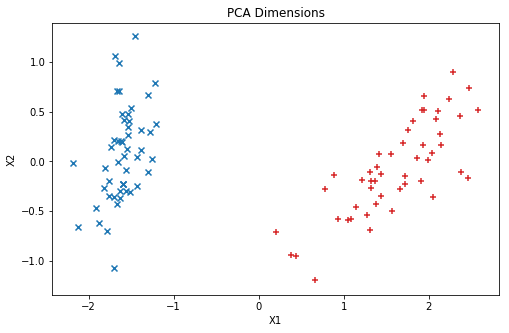

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(df['X1'][df['label'] == 'Iris-setosa'], df['X2'][df['label'] == 'Iris-setosa'], marker='x', color='C0')
plt.scatter(df['X1'][df['label'] == 'Iris-versicolor'], df['X2'][df['label'] == 'Iris-versicolor'], marker='+', color='C3')
plt.title('PCA Dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

#### Logistic Regression

In [5]:
class LogisticRegression():
    
    def loss(self, X, y, theta):
        YX = X * y[:,None]
        hy = YX @ theta
        loss = np.log(1+np.exp(-hy)).mean()
        error = (hy <= 0).mean()
        return loss, error
    
    def gradient(self, X, y, theta):
        YX = X * y[:,None]
        m = X.shape[0]
        gradient = -YX.T @ (1/(1+np.exp(YX @ theta)))/m
        return gradient

    def gradient_descent(self, X, y, alpha, iters):
        m,n = X.shape
        theta = np.zeros(n)
        loss, err = np.zeros(iters), np.zeros(iters)
        for t in range(iters):
            loss[t], err[t] = self.loss(X, y, theta)
            theta -= alpha * self.gradient(X, y, theta)
        return theta, loss, err

In [6]:
X = df[['X1', 'X2']].as_matrix()
y = ((df['label'] == 'Iris-setosa') * 2 - 1).as_matrix()   # convert to 1 / -1 labels
model = LogisticRegression()
theta, loss, err = model.gradient_descent(X, y, 0.1, 500)

Text(0,0.5,'X2')

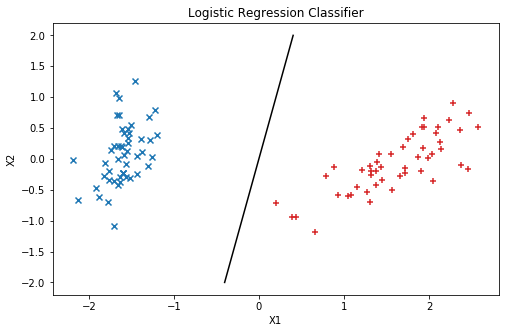

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df['X1'][df['label'] == 'Iris-setosa'], df['X2'][df['label'] == 'Iris-setosa'], marker='x', color='C0')
plt.scatter(df['X1'][df['label'] == 'Iris-versicolor'], df['X2'][df['label'] == 'Iris-versicolor'], marker='+', color='C3')
line_x2_points = np.linspace(-2, 2)
line_x1_points = -theta[1]/theta[0] * line_x2_points
plt.plot(line_x1_points, line_x2_points, 'k-')
plt.title('Logistic Regression Classifier')
plt.xlabel('X1')
plt.ylabel('X2')

#### Visualizing loss

Visualizing loss over epochs.

Text(0,0.5,'Loss')

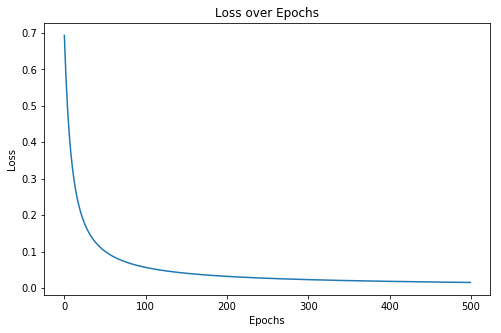

In [8]:
plt.figure(figsize=(8,5))
epochs = range(500)
plt.plot(epochs, loss)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

The optimal theta from gradient descent.

In [9]:
theta

array([-3.06461936,  0.61731568])

Creating a grid of theta values (centered at optimal theta) for evaluating loss.

Text(0,0.5,'theta1')

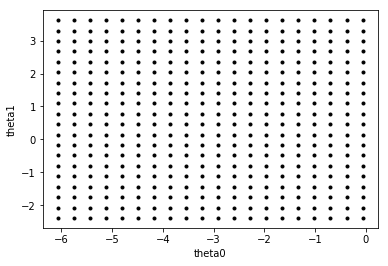

In [10]:
theta_0_range = np.linspace(theta[0] - 3, theta[0] + 3, 20)
theta_1_range = np.linspace(theta[1] - 3, theta[1] + 3, 20)
theta_0, theta_1 = np.meshgrid(theta_0_range, theta_1_range)
plt.plot(theta_0, theta_1, '.', color='k')
plt.xlabel('theta0')
plt.ylabel('theta1')

Visualizing the loss landscape with a contour plot.

Text(0,0.5,'theta1')

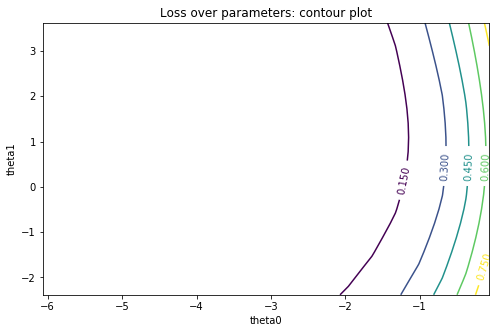

In [11]:
grid_rows, grid_cols = theta_0.shape
loss = np.zeros((grid_rows, grid_cols))
for i in range(grid_rows):
    for j in range(grid_cols):
        theta_0_ij = theta_0[i, j]
        theta_1_ij = theta_1[i, j]
        theta = np.array([theta_0_ij, theta_1_ij])
        loss[i, j] = model.loss(X, y, theta)[0]

plt.figure(figsize=(8, 5))
contour = plt.contour(theta_0, theta_1, loss)
plt.clabel(contour, inline=1, fontsize=10)
plt.title('Loss over parameters: contour plot')
plt.xlabel('theta0')
plt.ylabel('theta1')

Visualizing the loss landscape with a 3D plot.

Good matplotlib 3D plotting reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

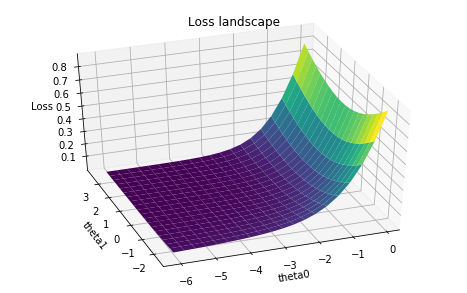

In [13]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

ax.plot_surface(theta_0, theta_1, loss, cmap='viridis')
ax.set_title('Loss landscape')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Loss')
ax.view_init(40, 250)

Saving theta and loss point values

In [27]:
df = pd.DataFrame({'theta_0': theta_0.reshape(400),
                   'theta_1': theta_1.reshape(400),
                   'loss': loss.reshape(400)},
                  columns = ['theta_0', 'theta_1', 'loss'])
df.to_csv('data/iris_LR_theta_loss.csv', index=False)
df.head()

,theta_0,theta_1,loss
0,-6.064619,-2.382684,0.024660
1,-5.748830,-2.382684,0.027097
2,-5.433040,-2.382684,0.029851
3,-5.117251,-2.382684,0.032993
4,-4.801461,-2.382684,0.036622
